# LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DATA

In [2]:
%cd /home/think/Desktop/5x4_sample

/home/think/Desktop/5x4_sample


In [3]:
all_x20 = pd.read_csv('5x4_df_samples.csv')
all_x20.drop(all_x20.columns[[0]], axis=1, inplace=True)
all_x20.head()

,id,x,y,z
0,1,0.100000,0.100000,0.100000
1,1,0.097913,0.101250,0.096328
2,1,0.095850,0.102482,0.092863
3,1,0.093809,0.103694,0.089594
4,1,0.091790,0.104888,0.086511


In [4]:
lookup_x20 = pd.read_csv('5x4_df_lookup.csv')
lookup_x20.drop(lookup_x20.columns[[0]], axis=1, inplace=True)
lookup_x20.head()

,id,sample_name,ic_x,ic_y,ic_z,params
0,1,rossler,0.1,0.1,0.1,"{'a': 0.2, 'b': 0.2, 'c': 5.7}"
1,2,rossler,0.2,0.2,0.2,"{'a': 0.2, 'b': 0.2, 'c': 5.7}"
2,3,rossler,0.3,0.3,0.3,"{'a': 0.2, 'b': 0.2, 'c': 5.7}"
3,4,rossler,0.4,0.4,0.4,"{'a': 0.2, 'b': 0.2, 'c': 5.7}"
4,5,lorenz63,0.1,0.1,0.1,"{'sigma': 10, 'beta': 2.6666666666666665, 'rho..."


In [5]:
#rossler_sample_1 = all_x20[all_x20['id'] == 1].copy()
#rossler_sample_1 = all_x20.loc[ all_x20['id'] == 1, ['x', 'y'] ].copy()
rossler_sample_1 = all_x20.loc[ all_x20['id'] == 1, ['x'] ].copy()

In [6]:
rossler_sample_1

,x
0,0.100000
1,0.097913
2,0.095850
3,0.093809
4,0.091790
...,...
9995,-3.812888
9996,-3.773334
9997,-3.733280
9998,-3.692730


## Scaling

In [7]:
# Apply a MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rossler_sample_1_scaled = pd.DataFrame(scaler.fit_transform(rossler_sample_1), columns = ['x'])

In [8]:
rossler_sample_1_scaled

,x
0,0.448117
1,0.448015
2,0.447914
3,0.447815
4,0.447717
...,...
9995,0.257544
9996,0.259470
9997,0.261421
9998,0.263396


## Visualization

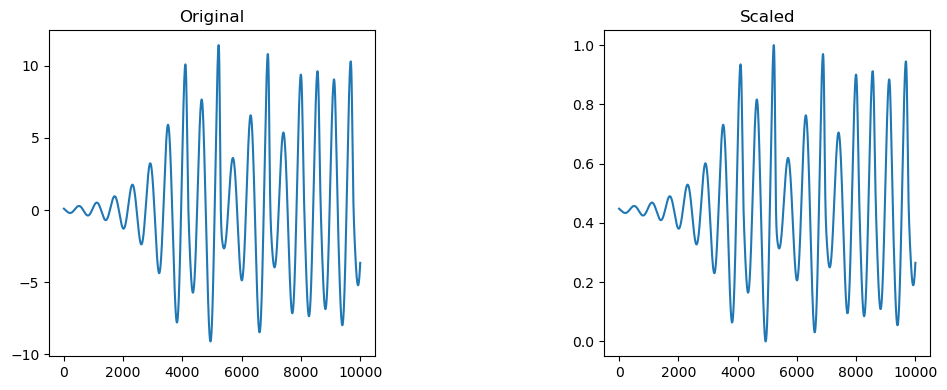

In [9]:
# import matplotlib.pyplot as plt

# # Calculate global min and max for y-axis limits
# y_min = min(rossler_sample_1['x'].min(), rossler_sample_1_scaled['x'].min())
# y_max = max(rossler_sample_1['x'].max(), rossler_sample_1_scaled['x'].max())

# # Create subplots
# fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# # Plot original
# rossler_sample_1['x'].plot(ax=axs[0], title='Original')
# axs[0].set_ylim(y_min, y_max)

# # Plot scaled
# rossler_sample_1_scaled['x'].plot(ax=axs[1], title='Scaled')
# axs[1].set_ylim(y_min, y_max)

# plt.tight_layout()
# plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot original
rossler_sample_1['x'].plot(ax=axs[0], title='Original')
# Plot scaled
rossler_sample_1_scaled['x'].plot(ax=axs[1], title='Scaled')

# Let each subplot auto-scale its own y-axis
# But make sure they use the same "physical size" vertically
for ax in axs:
    ax.set_box_aspect(1)  # Makes both plots square in aspect ratio

plt.tight_layout()
plt.show()

## Training and Test Split

In [10]:
# Count decimal digits per value
decimal_lengths = rossler_sample_1_scaled['x'].apply(lambda v: len(str(v).split('.')[-1]) if '.' in str(v) else 0)

# Check if all are the same
unique_lengths = decimal_lengths.unique()

print("Unique decimal lengths:", unique_lengths)

if len(unique_lengths) == 1:
    print(f"✅ All values have {unique_lengths[0]} digits after the decimal.")
else:
    print("❌ Values have varying decimal lengths.")

Unique decimal lengths: [16 17 15 13 14 18 19 20  1 12]
❌ Values have varying decimal lengths.


In [11]:
Full = rossler_sample_1_scaled['x'].values

In [12]:
n_samples = len(Full)
train_size = int(0.90 * n_samples)

train_data = Full[:train_size]
test_data = Full[train_size:]

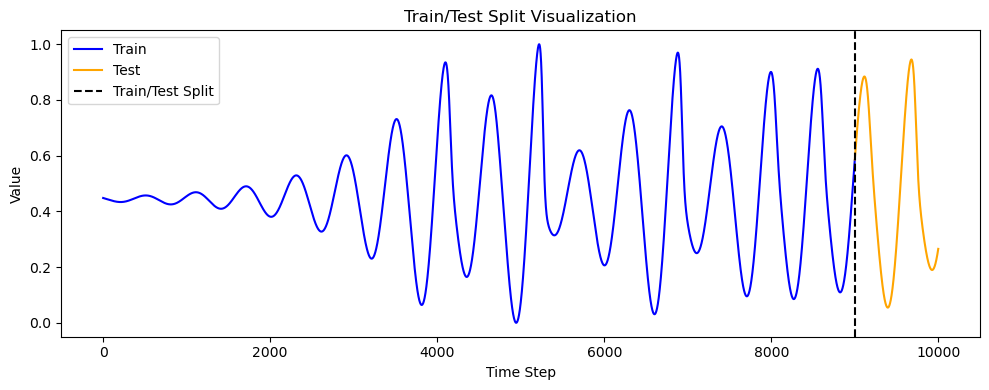

In [13]:
# Define x-axis ranges based on the lengths
train_end = len(train_data)
x_train = np.arange(train_end)
x_test = np.arange(train_end, train_end + len(test_data))
# Plot
plt.figure(figsize=(10, 4))
plt.plot(x_train, train_data, label='Train', color='blue')
plt.plot(x_test, test_data, label='Test', color='orange')

# Optional vertical line to indicate the split
plt.axvline(x=train_end, color='black', linestyle='--', label='Train/Test Split')

plt.legend()
plt.title("Train/Test Split Visualization")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

# Vanilla Neural Network

In [32]:
full_array = rossler_sample_1_scaled['x'].values
last_twenty = full_array[-200:]
mochado = full_array[:-200]

**MLP MODEL**

In [33]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
      # find the end of this pattern
      end_ix = i + n_steps
      # check if we are beyond the sequence
      if end_ix > len(sequence)-1:
         break
      # gather input and outpu parts of the pattern
      seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
      X.append(seq_x)
      y.append(seq_y)

    return array(X), array(y)

In [34]:
# choose a number of time steps
n_steps = 1
# split into samples
# transform to a supervised learning problem
X, y = split_sequence(mochado, n_steps)
# show each example
for i in range(len(X)):
   print(X[i], y[i])

[0.44811656] 0.4480149030581577
[0.4480149] 0.4479144317814097
[0.44791443] 0.44781505755579926
[0.44781506] 0.4477166925672069
[0.44771669] 0.4476192540214631
[0.44761925] 0.447522663292553
[0.44752266] 0.44742681150329144
[0.44742681] 0.4473316282211968
[0.44733163] 0.44723706990745105
[0.44723707] 0.44714309354190457
[0.44714309] 0.44704965662307633
[0.44704966] 0.44695671716815405
[0.44695672] 0.4468642337129939
[0.44686423] 0.4467721653121208
[0.44677217] 0.4466804715387281
[0.44668047] 0.44658911248467786
[0.44658911] 0.4464980487605008
[0.44649805] 0.4464072414953961
[0.44640724] 0.4463166523372317
[0.44631665] 0.44622624345254397
[0.44622624] 0.446135977526538
[0.44613598] 0.44604581776308744
[0.44604582] 0.4459557278847346
[0.44595573] 0.4458656721326903
[0.44586567] 0.4457756162096066
[0.44577562] 0.4456855649006787
[0.44568556] 0.4455955230453022
[0.44559552] 0.4455054817659285
[0.44550548] 0.44541543243785736
[0.44541543] 0.4453253666892367
[0.44532537] 0.445235276401063
[0

In [35]:
import numpy as np

a = np.arange(1, 11)        # [1 2 3 4 5 6 7 8 9 10]
b = np.arange(3, 11)        # [3 4 5 6 7 8 9 10]
# Pad the shorter array to make lengths equal
pad = len(a) - len(b)
b_padded = np.pad(b, (0, pad), 'constant')
# Cross-correlation
correlation = np.correlate(a, b_padded, mode='full')
lag = correlation.argmax() - (len(b_padded) - 1)

print("Best shift (lag):", lag)

Best shift (lag): 2


In [36]:
import tensorflow as tf

In [37]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

In [38]:
#define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/home/think/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, activation='tanh', input_dim=n_steps))   # More neurons, smoother activation
model.add(BatchNormalization())                               # Helps with internal covariate shift
model.add(Dropout(0.2))                                       # Light regularization
model.add(Dense(64, activation='tanh'))                       # Second hidden layer
model.add(Dense(1))                                           # Output layer

optimizer = Adam(learning_rate=0.001)                         # Tunable
model.compile(optimizer=optimizer, loss='mse')


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(256, activation='tanh', input_dim=n_steps))   # Big first layer
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='tanh'))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.0005)  # Lower learning rate for stability
model.compile(optimizer=optimizer, loss='mse')

In [41]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
]

history = model.fit(X, y,
                    epochs=300,
                    batch_size=64,
                    validation_split=0.1,
                    shuffle=False,
                    callbacks=callbacks,
                    verbose=1)


Epoch 1/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3290 - val_loss: 0.1096 - learning_rate: 5.0000e-04
Epoch 2/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0806 - val_loss: 0.2082 - learning_rate: 5.0000e-04
Epoch 3/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0484 - val_loss: 0.2087 - learning_rate: 5.0000e-04
Epoch 4/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0388 - val_loss: 0.2056 - learning_rate: 5.0000e-04
Epoch 5/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0307 - val_loss: 0.1857 - learning_rate: 5.0000e-04
Epoch 6/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0293 - val_loss: 0.1816 - learning_rate: 5.0000e-04
Epoch 7/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0271 - val_loss: 0.1406 - learning_rate: 2.5000e-04
Epoch 8/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0269 - val_loss: 0.1672 - learning_rate: 2.5000e-04
Epoch 9/300
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0257 - val_loss: 

In [42]:
last_twenty

array([0.36815927, 0.36562102, 0.36310662, 0.36061516, 0.35814573,
       0.35569746, 0.35326947, 0.35086092, 0.34847098, 0.34609883,
       0.34374369, 0.34140479, 0.33908182, 0.33677457, 0.3344828 ,
       0.33220627, 0.32994473, 0.32769796, 0.32546572, 0.32324779,
       0.32104394, 0.31885395, 0.31667761, 0.3145147 , 0.31236506,
       0.31022884, 0.30810612, 0.30599695, 0.30390138, 0.30181947,
       0.29975127, 0.29769685, 0.29565626, 0.29362957, 0.29161683,
       0.28961811, 0.28763351, 0.28566322, 0.28370742, 0.28176626,
       0.27983992, 0.27792856, 0.27603235, 0.27415144, 0.27228601,
       0.27043622, 0.26860224, 0.26678422, 0.26498236, 0.26319689,
       0.26142799, 0.25967588, 0.25794075, 0.2562228 , 0.25452223,
       0.25283924, 0.25117401, 0.24952675, 0.24789764, 0.24628687,
       0.24469467, 0.24312123, 0.24156676, 0.24003146, 0.23851553,
       0.23701918, 0.23554259, 0.23408597, 0.23264949, 0.23123337,
       0.22983777, 0.2284629 , 0.22710893, 0.22577607, 0.22446

In [ ]:
# # demonstrate prediction
# x_input = last_twenty[:10]
# x_input = x_input.reshape((1, n_steps))
# yhat = model.predict(x_input, verbose=0)

In [43]:
# demonstrate prediction
x_input = array([0.23166857])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)

In [44]:
print(yhat)

[[0.4569155]]


In [45]:
# demonstrate prediction
x_input = array([-4.3634243])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)

In [46]:
print(yhat)

[[0.33852303]]


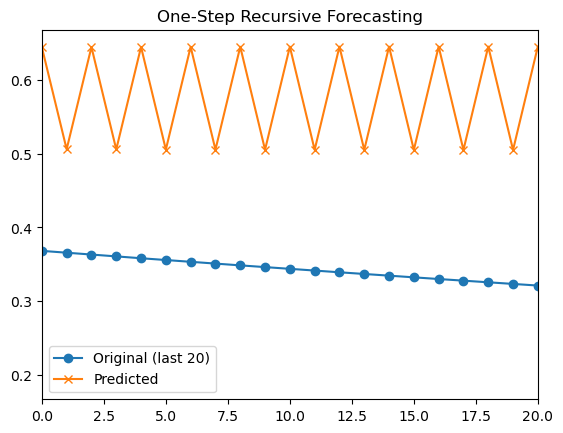

In [47]:
# Initialize input andlight caffeine blend list to store predictions
x_input = last_twenty[0].reshape((1, n_steps))  # start with the first value
predictions = []

# Loop to predict one step at a time
for i in range(len(last_twenty)):
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0, 0])
    
    # update input to next step — use prediction as input
    x_input = yhat.reshape((1, n_steps))

# Convert predictions to numpy array
predictions = np.array(predictions)

# Plot
plt.plot(last_twenty, label='Original (last 20)', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.legend()
plt.xlim(0,20)
plt.title('One-Step Recursive Forecasting')
plt.show()

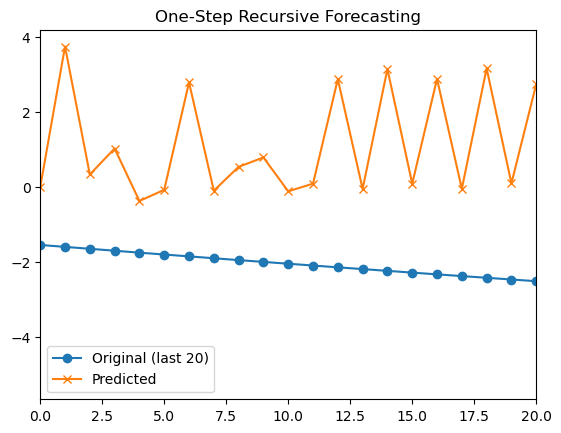

In [31]:
# Plot
plt.plot(last_twenty, label='Original (last 20)', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.legend()
plt.xlim(0,20)
plt.title('One-Step Recursive Forecasting')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import skew

# Assuming last_twenty is a 1D numpy array
x_input = last_twenty[0].reshape((1, n_steps))  # Starting point
predictions = []

for _ in range(len(last_twenty)):
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0, 0])
    x_input = yhat.reshape((1, n_steps))  # Recursive input

predictions = np.array(predictions)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(last_twenty, label='Ground Truth', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.title('Recursive One-Step Forecast')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
true = last_twenty
pred = predictions

In [ ]:
from sklearn import metrics
from scipy.stats import skew
import numpy as np

metric_dict = {
    "MAE": metrics.mean_absolute_error(true, pred),
    "MSE": metrics.mean_squared_error(true, pred),
    "RMSE": np.sqrt(metrics.mean_squared_error(true, pred)),
    "R2": metrics.r2_score(true, pred),
    "Explained Variance": metrics.explained_variance_score(true, pred),
    "Max Error": metrics.max_error(true, pred),
    "Median AE": metrics.median_absolute_error(true, pred),
    "Mean Bias": np.mean(pred - true),
    "Mean Forecast": np.mean(pred),
    "Mean Ground Truth": np.mean(true),
    "Std Forecast": np.std(pred),
    "Std Ground Truth": np.std(true),
    "MASE": np.mean(np.abs(pred - true)) / np.mean(np.abs(np.diff(true))),
    "MAPE": np.mean(np.abs((true - pred) / true)) * 100 if np.all(true != 0) else np.nan,
    "SMAPE": 100 * np.mean(2 * np.abs(pred - true) / (np.abs(pred) + np.abs(true))),
    "NRMSE": np.sqrt(metrics.mean_squared_error(true, pred)) / (np.max(true) - np.min(true)),
    "Cosine Similarity": metrics.pairwise.cosine_similarity(true.reshape(1, -1), pred.reshape(1, -1))[0, 0],
    "Pearson r": np.corrcoef(true, pred)[0, 1],
    "Skew True": skew(true),
    "Skew Pred": skew(pred),
}

In [ ]:
print("📊 Forecast Evaluation Metrics (Last 20 Points):\n")
for name, val in metric_dict.items():
    print(f"{name:<20}: {val:.6f}")

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()